### Libraries import: 

In [1]:
## Import libraries: 

import pandas as pd
import numpy as np
from src import functions as func
# Viz
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuration 
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # to viz all columns in the DF

# Manage warnings: 
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Data load: 

In [2]:
# Convert files into DFs: 
df_test = pd.read_csv('DB/test.csv')
df_test

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive
5,506,@user1069,2025-02-12 08:20:15,Kamala Harris is making strides in healthcare ...,Kamala Harris,Democratic Party,90,340,positive
6,507,@taxTalk5,2025-02-12 09:40:30,Trump's tax cuts are benefiting small businesses.,Donald Trump,Republican Party,95,420,positive
7,508,@sustainability4,2025-02-12 10:30:50,Jill Stein promotes the adoption of electric v...,Jill Stein,Green Party,65,205,positive
8,509,@independantView7,2025-02-12 11:55:20,Robert Kennedy's policies blend diverse ideolo...,Robert Kennedy,Independent,22,95,neutral
9,510,@freedomAdvocate7,2025-02-12 12:40:50,Chase Oliver's economic plans focus on maximiz...,Chase Oliver,Libertarian Party,45,150,positive


In [3]:
df_training = pd.read_csv('DB/train.csv')
df_training

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


In [4]:
df_validation = pd.read_csv('DB/val.csv')
df_validation

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive
5,556,@user1078,2025-02-22 08:20:15,Kamala Harris is making strides in healthcare ...,Kamala Harris,Democratic Party,90,340,positive
6,557,@taxTalk6,2025-02-22 09:40:30,Trump's tax cuts are benefiting small businesses.,Donald Trump,Republican Party,95,420,positive
7,558,@sustainability5,2025-02-22 10:30:50,Jill Stein promotes the adoption of electric v...,Jill Stein,Green Party,65,205,positive
8,559,@independantView7,2025-02-22 11:55:20,Robert Kennedy's policies blend diverse ideolo...,Robert Kennedy,Independent,22,95,neutral
9,560,@freedomAdvocate8,2025-02-22 12:40:50,Chase Oliver's economic plans focus on maximiz...,Chase Oliver,Libertarian Party,45,150,positive


### Data exploration (EDA): 

In [5]:
## Exploration DF test: 

func.exploration(df_test)

The DataFrame has 50 rows and 9 columns.
It has 0 duplicate records, which accounts for 0.0% of the data. 

There are 0 columns with missing data, and they are: 
[]

And with no missing values, there are 9 columns, and they are: 
['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate', 'party', 'retweets', 'likes', 'sentiment']


Below is a breakdown of missing data, data types, and the number of values:


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,50
user_handle,0.0%,100.0%,object,49
timestamp,0.0%,100.0%,object,50
tweet_text,0.0%,100.0%,object,48
candidate,0.0%,100.0%,object,5


Main statistics for categorical columns:


,count,unique,top,freq
user_handle,50,49,@freedomAdvocate7,2
timestamp,50,50,2025-02-11 08:30:10,1
tweet_text,50,48,Robert Kennedy's policies blend diverse ideolo...,2
candidate,50,5,Kamala Harris,10
party,50,5,Democratic Party,10
sentiment,50,3,positive,34


Main statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
tweet_id,50.0,525.50,14.577380,501.0,513.25,525.5,537.75,550.0
retweets,50.0,64.36,27.942185,18.0,41.25,67.5,90.00,115.0
likes,50.0,248.40,122.167667,85.0,150.00,222.5,340.00,480.0


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,50
user_handle,0.0%,100.0%,object,49
timestamp,0.0%,100.0%,object,50
tweet_text,0.0%,100.0%,object,48
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5
retweets,0.0%,100.0%,int64,20
likes,0.0%,100.0%,int64,32
sentiment,0.0%,100.0%,object,3


In [6]:
## Exploration DF train: 

func.exploration(df_training)

The DataFrame has 500 rows and 9 columns.
It has 0 duplicate records, which accounts for 0.0% of the data. 

There are 0 columns with missing data, and they are: 
[]

And with no missing values, there are 9 columns, and they are: 
['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate', 'party', 'retweets', 'likes', 'sentiment']


Below is a breakdown of missing data, data types, and the number of values:


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,500
user_handle,0.0%,100.0%,object,437
timestamp,0.0%,100.0%,object,500
tweet_text,0.0%,100.0%,object,197
candidate,0.0%,100.0%,object,5


Main statistics for categorical columns:


,count,unique,top,freq
user_handle,500,437,@libertyMovement,3
timestamp,500,500,2024-11-03 08:45:00,1
tweet_text,500,197,Robert Kennedy's independent stance is attract...,10
candidate,500,5,Kamala Harris,100
party,500,5,Democratic Party,100
sentiment,500,4,positive,328


Main statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
tweet_id,500.0,250.500,144.481833,1.0,125.75,250.5,375.25,500.0
retweets,500.0,64.236,27.715349,18.0,40.00,70.0,90.00,120.0
likes,500.0,248.920,120.562034,85.0,150.00,225.0,340.00,500.0


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,500
user_handle,0.0%,100.0%,object,437
timestamp,0.0%,100.0%,object,500
tweet_text,0.0%,100.0%,object,197
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5
retweets,0.0%,100.0%,int64,24
likes,0.0%,100.0%,int64,44
sentiment,0.0%,100.0%,object,4


In [7]:
## Exploration DF validation: 

func.exploration(df_validation)

The DataFrame has 50 rows and 9 columns.
It has 0 duplicate records, which accounts for 0.0% of the data. 

There are 0 columns with missing data, and they are: 
[]

And with no missing values, there are 9 columns, and they are: 
['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate', 'party', 'retweets', 'likes', 'sentiment']


Below is a breakdown of missing data, data types, and the number of values:


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,50
user_handle,0.0%,100.0%,object,48
timestamp,0.0%,100.0%,object,50
tweet_text,0.0%,100.0%,object,48
candidate,0.0%,100.0%,object,5


Main statistics for categorical columns:


,count,unique,top,freq
user_handle,50,48,@independantView7,2
timestamp,50,50,2025-02-21 08:30:10,1
tweet_text,50,48,Robert Kennedy's policies blend diverse ideolo...,2
candidate,50,5,Kamala Harris,10
party,50,5,Democratic Party,10
sentiment,50,3,positive,34


Main statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
tweet_id,50.0,575.50,14.577380,551.0,563.25,575.5,587.75,600.0
retweets,50.0,64.36,27.942185,18.0,41.25,67.5,90.00,115.0
likes,50.0,248.40,122.167667,85.0,150.00,222.5,340.00,480.0


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,50
user_handle,0.0%,100.0%,object,48
timestamp,0.0%,100.0%,object,50
tweet_text,0.0%,100.0%,object,48
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5
retweets,0.0%,100.0%,int64,20
likes,0.0%,100.0%,int64,32
sentiment,0.0%,100.0%,object,3


In [8]:
## DF concat

df_tweets = pd.concat([df_training, df_test, df_validation], axis=0, ignore_index=True)

In [9]:
df_tweets

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
595,596,@user1085,2025-03-02 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
596,597,@econTalk8,2025-03-02 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
597,598,@greenFutureNow8,2025-03-02 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
598,599,@indiePerspective8,2025-03-02 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


In [10]:
func.exploration(df_tweets)

The DataFrame has 600 rows and 9 columns.
It has 0 duplicate records, which accounts for 0.0% of the data. 

There are 0 columns with missing data, and they are: 
[]

And with no missing values, there are 9 columns, and they are: 
['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate', 'party', 'retweets', 'likes', 'sentiment']


Below is a breakdown of missing data, data types, and the number of values:


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,600
user_handle,0.0%,100.0%,object,498
timestamp,0.0%,100.0%,object,600
tweet_text,0.0%,100.0%,object,197
candidate,0.0%,100.0%,object,5


Main statistics for categorical columns:


,count,unique,top,freq
user_handle,600,498,@econDebate6,3
timestamp,600,600,2024-11-03 08:45:00,1
tweet_text,600,197,Trump's latest tax reforms are criticized for ...,12
candidate,600,5,Kamala Harris,120
party,600,5,Democratic Party,120
sentiment,600,4,positive,396


Main statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
tweet_id,600.0,300.500000,173.349358,1.0,150.75,300.5,450.25,600.0
retweets,600.0,64.256667,27.706381,18.0,40.00,70.0,90.00,120.0
likes,600.0,248.833333,120.625341,85.0,150.00,225.0,340.00,500.0


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,600
user_handle,0.0%,100.0%,object,498
timestamp,0.0%,100.0%,object,600
tweet_text,0.0%,100.0%,object,197
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5
retweets,0.0%,100.0%,int64,24
likes,0.0%,100.0%,int64,44
sentiment,0.0%,100.0%,object,4


#### Data transformation & cleaning

In [11]:
## Transform Timestamp column to datetime (currently data type is object) and split to have one column for the date and another one for the time

func.transform_datetime_columns(df_tweets,'timestamp')

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment,date,time
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive,2024-11-03,08:45:00
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive,2024-11-03,09:15:23
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive,2024-11-03,10:05:45
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral,2024-11-03,11:20:10
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive,2024-11-03,12:35:55
...,...,...,...,...,...,...,...,...,...,...,...
595,596,@user1085,2025-03-02 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive,2025-03-02,08:50:30
596,597,@econTalk8,2025-03-02 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral,2025-03-02,09:15:55
597,598,@greenFutureNow8,2025-03-02 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive,2025-03-02,10:05:30
598,599,@indiePerspective8,2025-03-02 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral,2025-03-02,11:35:25


In [12]:
df_tweets.dtypes

tweet_id                int64
user_handle            object
timestamp      datetime64[ns]
tweet_text             object
candidate              object
party                  object
retweets                int64
likes                   int64
sentiment              object
date           datetime64[ns]
time                   object
dtype: object

In [13]:
df_tweets = df_tweets.drop('timestamp', axis=1)

#### Numerical columns analysis

In [14]:
# Checking numerical columns statistics: 

df_tweets.describe().T

,count,mean,min,25%,50%,75%,max,std
tweet_id,600.0,300.5,1.0,150.75,300.5,450.25,600.0,173.349358
retweets,600.0,64.256667,18.0,40.0,70.0,90.0,120.0,27.706381
likes,600.0,248.833333,85.0,150.0,225.0,340.0,500.0,120.625341
date,600,2024-08-29 10:48:00,2024-01-01 00:00:00,2024-01-30 18:00:00,2024-11-21 12:00:00,2024-12-21 06:00:00,2025-03-02 00:00:00,NaN


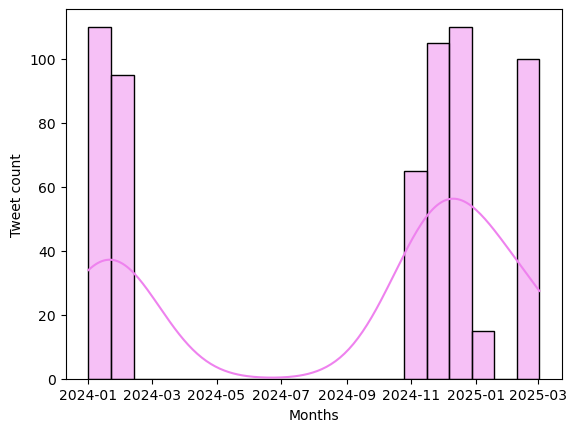

In [15]:
## Histplot: 
sns.histplot(x = "date", 
             data = df_tweets, 
             color = "violet", 
             kde = True, 
             bins = 20 )

plt.xlabel("Months")

plt.ylabel("Tweet count");

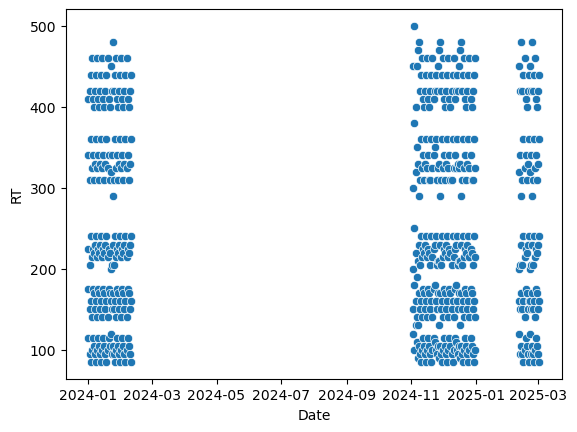

In [16]:
# creamos una gráfica básica usando 'sns.scatterplot()' 
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
sns.scatterplot(x = "date", 
                y = "likes", 
                data = df_tweets)

# cambiamos los nombres de los ejes
plt.xlabel("Date")
plt.ylabel("RT");

In [17]:
# Crear un nuevo DataFrame ordenado por la columna 'date'
df_tweets_sorted = df_tweets.sort_values(by='date').reset_index(drop=True)


In [18]:
df_tweets_sorted['year_month'] = df_tweets_sorted['date'].dt.to_period('M')

In [19]:
months_with_tweets = df_tweets_sorted['year_month'].unique()

In [20]:
months_with_tweets

<PeriodArray>
['2024-01', '2024-02', '2024-11', '2024-12', '2025-02', '2025-03']
Length: 6, dtype: period[M]

In [21]:
# Checking categorical column statistics: 

df_tweets.describe(include = "object").T

,count,unique,top,freq
user_handle,600,498,@econDebate6,3
tweet_text,600,197,Trump's latest tax reforms are criticized for ...,12
candidate,600,5,Kamala Harris,120
party,600,5,Democratic Party,120
sentiment,600,4,positive,396
time,600,139,08:30:10,16


In [22]:
df_tweets['tweet_text'].value_counts()

tweet_text
Trump's latest tax reforms are criticized for corporate favoritism.            12
Jill Stein's policies aim to make urban areas more sustainable.                12
Robert Kennedy's independent stance is attracting a diverse electorate.        12
Chase Oliver's commitment to liberty is resonating with many voters.           12
Chase Oliver's advocacy for free speech is gaining momentum.                   11
                                                                               ..
Robert Kennedy's policies appeal to a broad spectrum of voters.                 1
Trump's deregulation policies are controversial among experts.                  1
Kamala Harris is making significant progress in infrastructure development.     1
Chase Oliver's focus on personal freedom is resonating with voters.             1
Excited to see Kamala Harris leading the Democratic charge!                     1
Name: count, Length: 197, dtype: int64

In [23]:
## Verifying tweets that are repeated: 

tweet_counts = df_tweets['tweet_text'].value_counts()

repeated_tweets = tweet_counts[tweet_counts > 1]

repeated_tweet_texts = repeated_tweets.index # Obtain repeated tweets and the frecuency of repetitions

df_repeated_tweets = df_tweets[df_tweets['tweet_text'].isin(repeated_tweet_texts)]

df_repeated_tweets_sorted = df_repeated_tweets.sort_values(by='tweet_text')



In [24]:
df_repeated_tweets_sorted

,tweet_id,user_handle,tweet_text,candidate,party,retweets,likes,sentiment,date,time
339,340,@freedomFighter9,Chase Oliver advocates for eliminating unneces...,Chase Oliver,Libertarian Party,35,140,positive,2024-01-09,12:35:30
364,365,@freedomFighter10,Chase Oliver advocates for eliminating unneces...,Chase Oliver,Libertarian Party,35,140,positive,2024-01-14,12:35:30
169,170,@freedomFighter3,Chase Oliver advocates for eliminating unneces...,Chase Oliver,Libertarian Party,35,140,positive,2024-12-06,12:35:30
389,390,@freedomFighter11,Chase Oliver advocates for eliminating unneces...,Chase Oliver,Libertarian Party,35,140,positive,2024-01-19,12:35:30
269,270,@freedomFighter6,Chase Oliver advocates for eliminating unneces...,Chase Oliver,Libertarian Party,35,140,positive,2024-12-26,12:35:30
...,...,...,...,...,...,...,...,...,...,...
306,307,@econDebate6,Trump's trade approach is creating new interna...,Donald Trump,Republican Party,100,440,neutral,2024-01-03,09:15:30
277,278,@marketLeader3,Trump's trade policies are boosting American m...,Donald Trump,Republican Party,90,400,positive,2024-12-28,10:20:35
177,178,@marketLeader2,Trump's trade policies are boosting American m...,Donald Trump,Republican Party,90,400,positive,2024-12-08,10:20:35
136,137,@econDebate2,Trump's trade policies are reshaping global ma...,Donald Trump,Republican Party,100,440,neutral,2024-11-30,09:15:50


In [25]:
## User_handle and dates are different, so these are not duplicates. 

In [26]:
func.exploration(df_repeated_tweets_sorted)

The DataFrame has 503 rows and 10 columns.
It has 0 duplicate records, which accounts for 0.0% of the data. 

There are 0 columns with missing data, and they are: 
[]

And with no missing values, there are 10 columns, and they are: 
['tweet_id', 'user_handle', 'tweet_text', 'candidate', 'party', 'retweets', 'likes', 'sentiment', 'date', 'time']


Below is a breakdown of missing data, data types, and the number of values:


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,503
user_handle,0.0%,100.0%,object,402
tweet_text,0.0%,100.0%,object,100
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5


Main statistics for categorical columns:


,count,unique,top,freq
user_handle,503,402,@freedomFighter8,3
tweet_text,503,100,Robert Kennedy's independent stance is attract...,12
candidate,503,5,Chase Oliver,101
party,503,5,Libertarian Party,101
sentiment,503,4,positive,331
time,503,91,12:20:45,16


Main statistics for numerical columns:


,count,mean,min,25%,50%,75%,max,std
tweet_id,503.0,339.477137,31.0,219.0,349.0,474.5,600.0,159.188527
retweets,503.0,64.4334,18.0,40.0,70.0,90.0,115.0,27.723648
likes,503.0,249.294235,85.0,150.0,225.0,340.0,480.0,120.299878
date,503,2024-08-13 03:08:56.779324160,2024-01-01 00:00:00,2024-01-26 00:00:00,2024-11-21 00:00:00,2024-12-26 00:00:00,2025-03-02 00:00:00,NaN


,% missing,% non-missing,data_type,num_unique_values
tweet_id,0.0%,100.0%,int64,503
user_handle,0.0%,100.0%,object,402
tweet_text,0.0%,100.0%,object,100
candidate,0.0%,100.0%,object,5
party,0.0%,100.0%,object,5
retweets,0.0%,100.0%,int64,21
likes,0.0%,100.0%,int64,34
sentiment,0.0%,100.0%,object,4
date,0.0%,100.0%,datetime64[ns],104
time,0.0%,100.0%,object,91


### Graphics

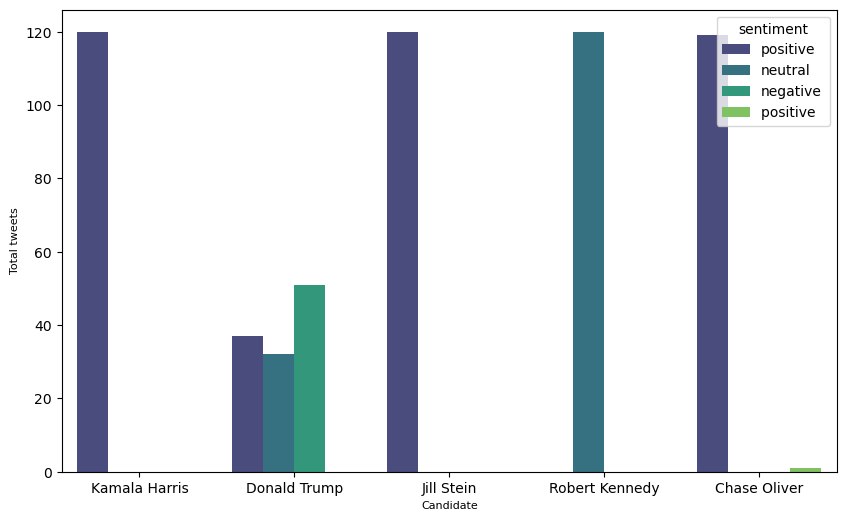

In [27]:
#Countplot of sentiment per candidate: 

plt.figure(figsize=(10, 6))  

# Plot with hue to separate by 'sentiment'
sns.countplot(x="candidate", 
              data=df_tweets, 
              palette="viridis", 
              hue="sentiment")

# Change the labels of the axes
plt.xlabel("Candidate", fontsize=8)
plt.ylabel("Total tweets", fontsize=8)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Tweets by Political Party')

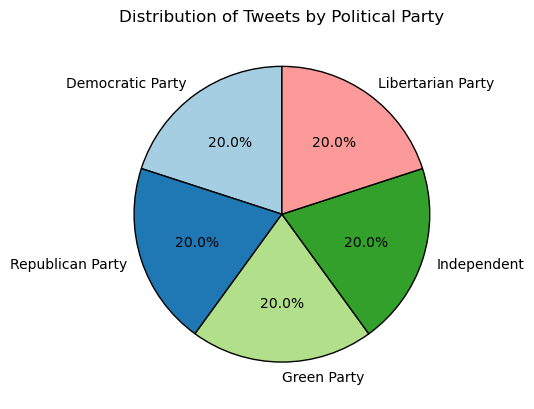

In [28]:
# Count the total tweets per political party
party_counts = df_tweets['party'].value_counts()

# Define colors for each party
# You can choose your own colors or use a predefined palette like 'Set3'
colors = plt.cm.Paired(range(len(party_counts)))

# Create the pie chart
plt.pie(party_counts, 
        labels=party_counts.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        textprops={'fontsize': 10}, 
        wedgeprops={'edgecolor': 'black'})  # Added black edge to the slices for better contrast

# Title of the chart
plt.title('Distribution of Tweets by Political Party')



In [29]:
df_tweets['party'].value_counts()

party
Democratic Party     120
Republican Party     120
Green Party          120
Independent          120
Libertarian Party    120
Name: count, dtype: int64

In [30]:
df_tweets.columns

Index(['tweet_id', 'user_handle', 'tweet_text', 'candidate', 'party',
       'retweets', 'likes', 'sentiment', 'date', 'time'],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Kamala Harris'),
  Text(1, 0, 'Donald Trump'),
  Text(2, 0, 'Jill Stein'),
  Text(3, 0, 'Robert Kennedy'),
  Text(4, 0, 'Chase Oliver')])

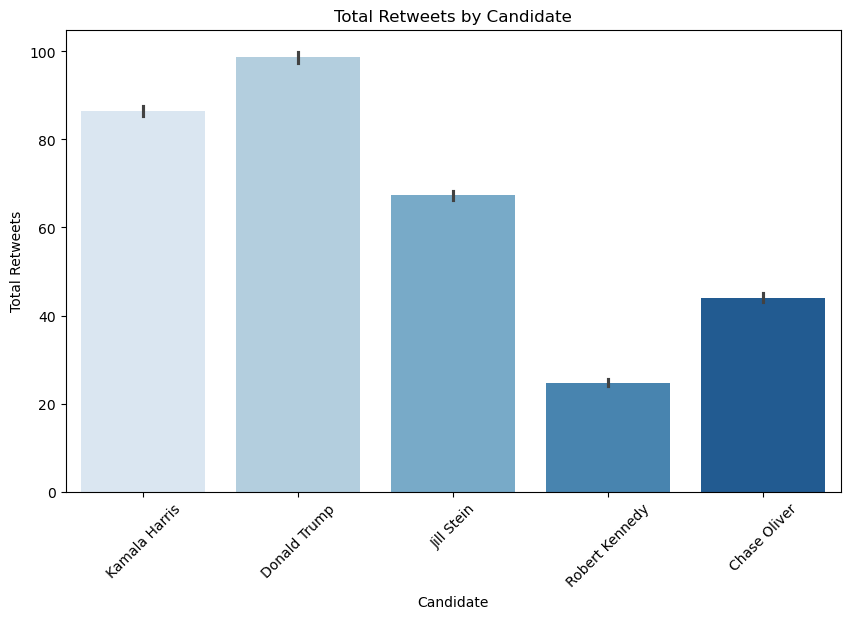

In [31]:
# Total number of retweets by candidate
plt.figure(figsize=(10, 6))
sns.barplot(x='candidate', y='retweets', data=df_tweets, palette='Blues')
plt.xlabel('Candidate', fontsize=10)
plt.ylabel('Total Retweets', fontsize=10)
plt.title('Total Retweets by Candidate')
plt.xticks(rotation=45)



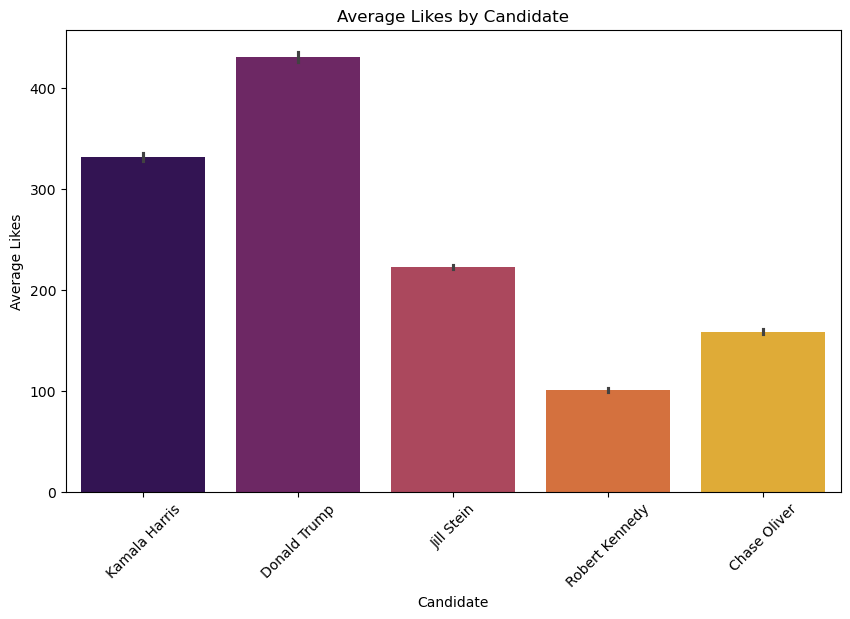

In [32]:
# Average number of likes by candidate
plt.figure(figsize=(10, 6))
sns.barplot(x='candidate', y='likes', data=df_tweets, palette='inferno')
plt.xlabel('Candidate', fontsize=10)
plt.ylabel('Average Likes', fontsize=10)
plt.title('Average Likes by Candidate')
plt.xticks(rotation=45)
plt.show()


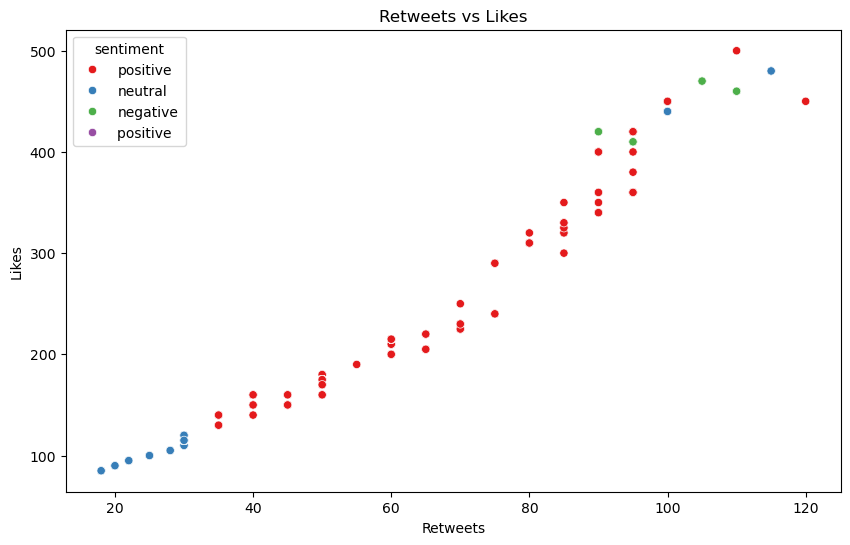

In [33]:
# Scatter plot for retweets vs likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retweets', y='likes', data=df_tweets, hue='sentiment', palette='Set1')
plt.xlabel('Retweets', fontsize=10)
plt.ylabel('Likes', fontsize=10)
plt.title('Retweets vs Likes')
plt.show()


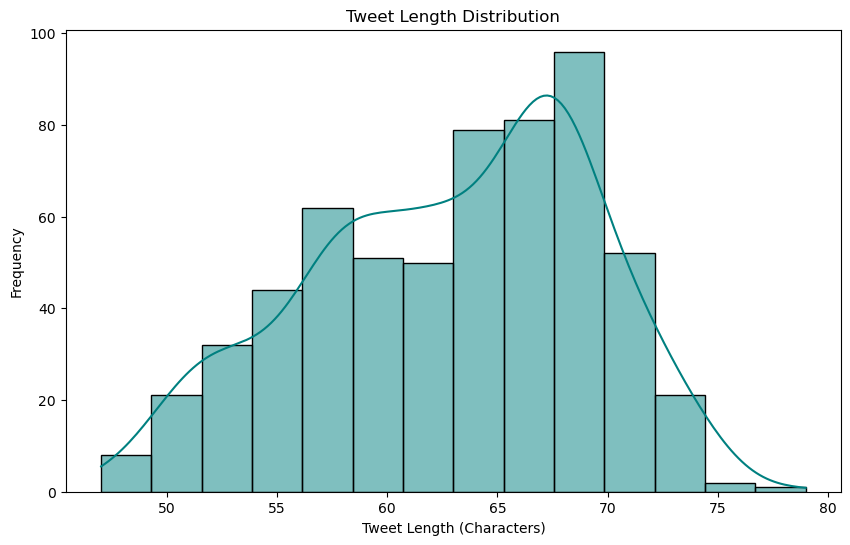

In [34]:
# Calculate the length of each tweet
df_tweets['tweet_length'] = df_tweets['tweet_text'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_tweets['tweet_length'], kde=True, color='teal')
plt.xlabel('Tweet Length (Characters)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Tweet Length Distribution')
plt.show()


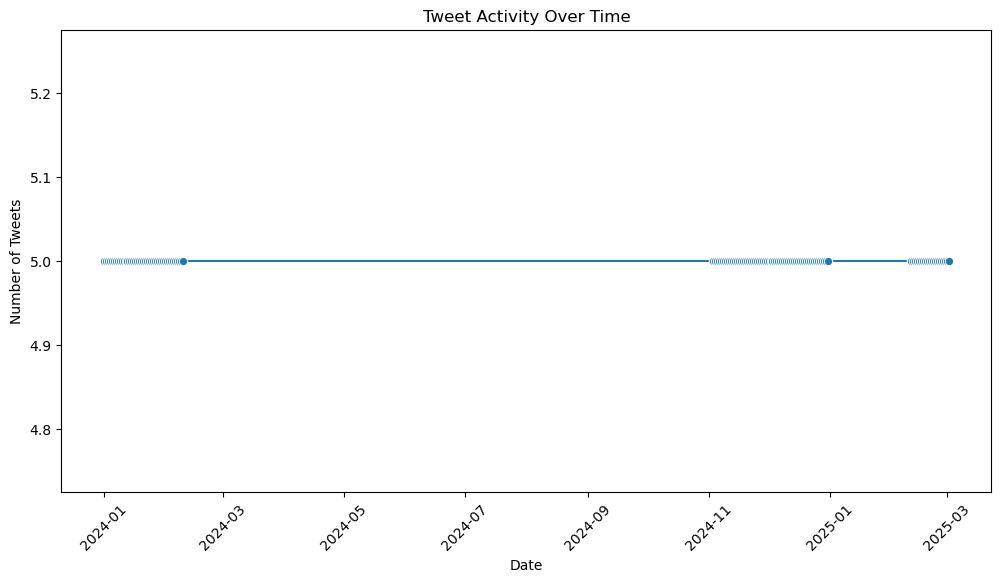

In [35]:
# Count the number of tweets by date
tweets_by_date = df_tweets.groupby('date').size().reset_index(name='tweet_count')

# Plot tweet activity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='tweet_count', data=tweets_by_date, marker='o')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Tweets', fontsize=10)
plt.title('Tweet Activity Over Time')
plt.xticks(rotation=45)
plt.show()


In [36]:
df_tweets


,tweet_id,user_handle,tweet_text,candidate,party,retweets,likes,sentiment,date,time,tweet_length
0,1,@user123,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive,2024-11-03,08:45:00,59
1,2,@politicsFan,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive,2024-11-03,09:15:23,53
2,3,@greenAdvocate,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive,2024-11-03,10:05:45,58
3,4,@indieVoice,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral,2024-11-03,11:20:10,71
4,5,@libertyLover,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive,2024-11-03,12:35:55,56
...,...,...,...,...,...,...,...,...,...,...,...
595,596,@user1085,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive,2025-03-02,08:50:30,52
596,597,@econTalk8,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral,2025-03-02,09:15:55,54
597,598,@greenFutureNow8,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive,2025-03-02,10:05:30,68
598,599,@indiePerspective8,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral,2025-03-02,11:35:25,66
